In [1]:
# tis script analyzes the dataset with authors for which we don't have ethnicity identified yet
# to check how many we want to keep and pass to the name-based ethnicity classifier
# different choices possible highlighted at the end of this notebook
# each step in this analysis is described here

# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

In [2]:
# 1: remove duplicates
df = pd.read_csv("AuthorsNoEthnicity.csv")
display(df)
df_unique = df['NormalizedName'].unique()
df_unique = pd.DataFrame(df_unique)
df_unique = df_unique.set_axis(['NormalizedName'], axis=1, inplace=False)
display(df_unique)
df_unique.to_csv("AuthorsNoEthnicityUnique.csv", index = False)

,NormalizedName
0,maria isabel lorca martin de villodres
1,mark d aupperlee
2,douglas c sundet
3,fernando inciarte arminan
4,fredrik vult von steyern
...,...
119161455,dzmitry paroshyn
119161456,정은영
119161457,فرحان العتيبي أفراح
119161458,rongo


,NormalizedName
0,maria isabel lorca martin de villodres
1,mark d aupperlee
2,douglas c sundet
3,fernando inciarte arminan
4,fredrik vult von steyern
...,...
51048302,esther saskia kostelijk
51048303,sergio andres murillo murillo
51048304,dzmitry paroshyn
51048305,فرحان العتيبي أفراح


In [3]:
# df = pd.read_csv("AuthorsNoEthnicity.csv")
# df_unique = pd.read_csv("AuthorsNoEthnicityUnique.csv")

In [3]:
# 2: check similarities with previous dataset (the one Bedoor shared with me)
# df_unique = df_unique.set_axis(['name'], axis=1, inplace=False)
df_previous = pd.read_csv("unique_authornames_MAG.csv", header = None)
df_previous = df_previous.set_axis(['NormalizedName'], axis=1, inplace=False)

df_merge = df_unique.merge(df_previous)
display(df_merge)

,NormalizedName
0,maria isabel lorca martin de villodres
1,mark d aupperlee
2,douglas c sundet
3,fernando inciarte arminan
4,fredrik vult von steyern
...,...
34028109,エム マムタニ ビノッド
34028110,anton a gladkov
34028111,максим юрьевич васильев
34028112,i o hwang


In [4]:
print("Number of unique names in both datasets: " + str(len(df_merge)))
print("Consists of ", "%.2f" %(len(df_merge)/len(df_previous)*100), "% of the previous dataset")
print("Consists of ", "%.2f" %(len(df_merge)/len(df_unique)*100), "% of the new dataset")

# create a dataset with names in df_unique but not in df_previous
df_unique_relevant = df_unique.merge(df_merge,how='left', indicator=True)
df_unique_relevant = df_unique_relevant[(df_unique_relevant['_merge']=='left_only')].copy() 
df_unique_relevant = df_unique_relevant.drop(columns='_merge').copy()
print("New dataset: ")
display(df_unique_relevant)
print("Number of unique names in new dataset: " + str(len(df_unique_relevant)))
df_unique_relevant.to_csv("AuthorsNoEthnicityUniqueRelevant.csv", index = False)

Number of unique names in both datasets: 34028114
Consists of  43.91 % of the previous dataset
Consists of  66.66 % of the new dataset
New dataset: 


,NormalizedName
39,g madarassy
66,william m farnhill
80,k s franzel
161,moran pirkner
217,nancy l farrey
...,...
51048302,esther saskia kostelijk
51048303,sergio andres murillo murillo
51048304,dzmitry paroshyn
51048305,فرحان العتيبي أفراح


Number of unique names in new dataset: 17020193


In [5]:
# 3: check frequency/distribution of names in output dataset 
df_count_name = df.copy()
df_count_name["Count"] = 1
df_count_name = df_count_name.groupby(['NormalizedName'], sort = False)['Count'].sum().reset_index()
df_count_name = df_count_name.sort_values("Count", ascending=False)
df_count_name = df_count_name.reset_index(drop=True)
print("Number of occurences of each name: ")
display(df_count_name)

Number of occurences of each name: 


,NormalizedName,Count
0,wang,38706
1,li,36639
2,zhang,34198
3,liu,27190
4,chen,23079
...,...,...
51048302,r j spinelli,1
51048303,r f mac niocaill,1
51048304,gayatri a vasudevan,1
51048305,ali moshar movahed,1


In [6]:
df_count_frequency = df_count_name.copy()
df_count_frequency["Frequency"] = 1
df_count_frequency = df_count_frequency.groupby(['Count'], sort = False)['Frequency'].sum().reset_index()
df_count_frequency = df_count_frequency.sort_values(by = ["Frequency", "Count"], ascending=False)
df_count_frequency = df_count_frequency.reset_index(drop=True)
df_count_frequency["PercentageUniqueRecords"] = (df_count_frequency["Frequency"]/51048307)*100
pd.set_option('display.float_format', lambda x: '%.10f' % x)
df_count_frequency["NumberOfRecords"] = df_count_frequency["Frequency"]* df_count_frequency["Count"]
df_count_frequency["PercentageTotalDataset"] = (df_count_frequency["NumberOfRecords"]/119161460)*100
display(df_count_frequency)

,Count,Frequency,PercentageUniqueRecords,NumberOfRecords,PercentageTotalDataset
0,1,37551398,73.5605159247,37551398,31.5130395348
1,2,6183352,12.1127464619,12366704,10.3781071497
2,3,2422148,4.7448155333,7266444,6.0979816796
3,4,1271674,2.4911188534,5086696,4.2687425951
4,5,776654,1.5214099069,3883270,3.2588304977
...,...,...,...,...,...
1787,776,1,0.0000019589,776,0.0006512173
1788,747,1,0.0000019589,747,0.0006268805
1789,735,1,0.0000019589,735,0.0006168102
1790,695,1,0.0000019589,695,0.0005832423


Max number of occurences:  38706

5 names with highest occurences: 
  NormalizedName  Count
0       wang      38706
1         li      36639
2      zhang      34198
3        liu      27190
4       chen      23079

Percentage of names with 1 occurence in the dataset with duplicates:  73.56051592465153
Percentage of names with 1 occurence in the dataset WITHOUT duplicates:  31.51303953476233


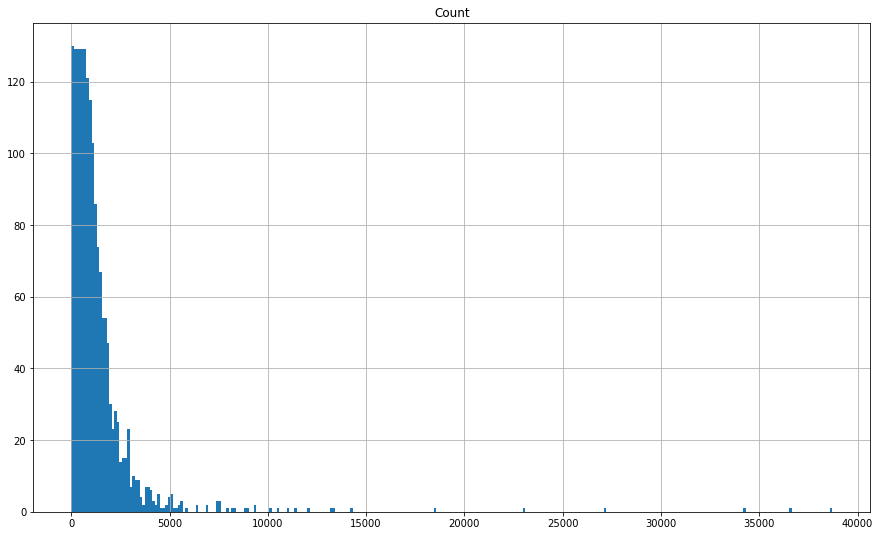

In [7]:
# Analysis
print("Max number of occurences: ", df_count_name.loc[0,"Count"])
print("\n5 names with highest occurences: ")
print(df_count_name.head(5))

print("\nPercentage of names with 1 occurence in the dataset with duplicates: ", df_count_frequency.loc[0,"PercentageUniqueRecords"])
print("Percentage of names with 1 occurence in the dataset WITHOUT duplicates: ", df_count_frequency.loc[0,"PercentageTotalDataset"])

# print("\nTotal percentage for unique records: ", df_count_frequency["PercentageUniqueRecords"].sum())
# print("Total frequency: ", df_count_frequency["Frequency"].sum())
# print("Total product: ", df_count_frequency["NumberOfRecords"].sum())
# print("Total percentage for total dataset: ", df_count_frequency["PercentageTotalDataset"].sum())

df_count_frequency.hist(column = "Count", bins=300, figsize=(15, 9))
plt.show()

In [8]:
# 4: count number of papers by name

# job script submitted
# output:
df_paper_count = pd.read_csv("AuthorsPaperCount.csv")
df_paper_count = df_paper_count.sort_values(by = "PaperCount", ascending=False)
display(df_paper_count)

,NormalizedName,PaperCount
259222,wang,51898
140867,li,48737
412999,zhang,46005
198274,liu,36326
542147,chen,29949
...,...,...
11144179,satheese chandra bose,1
11144181,suk siu leung,1
11144182,soc comercial hotelera kusi tambu y cia ltda,1
29995942,육심홍,1


In [10]:
# 5 get final df

# from part 1: keep unique names: left with 51 million
# from part 2: keep rows that were not in previous dataset: left with 17 million
# from part 3: just informative (explains why there is such a decrease after we remove duplicates)
# from part 4: different options

df_total = df_paper_count.merge(df_unique_relevant)
display(df_total)

# option 1: take the first 15 millions
print("Option 1: take the first 15 million rows:")
df_selection1 = df_total.head(15000000)
percentage = (df_selection1["PaperCount"].sum()/df_total["PaperCount"].sum())*100
print("Which corresponds to", "%.2f" %percentage, "% of the total number of publication before the final selection.")

# option 2: take the first 10 millions
print("\nOption 2: take the first 10 million rows:")
df_selection2 = df_total.head(10000000)
percentage = (df_selection2["PaperCount"].sum()/df_total["PaperCount"].sum())*100
print("Which corresponds to", "%.2f" %percentage, "% of the total number of publication before the final selection.")
# problem: it's unfair for authors with 1 publication: some are chosen and some are not

# option 3: remove all authors with 1 publication only
print("\nOption 3: remove all authors with 1 publication only:")
df_selection3 = df_total[df_total.PaperCount != 1]
percentage = (df_selection3["PaperCount"].sum()/df_total["PaperCount"].sum())*100
print("Which gives a dataset with", len(df_selection3), "rows.")
print("Which corresponds to", "%.2f" %percentage, "% of the total number of publication before the final selection.")

choice = 3

if choice == 1:
    df_final = df_selection1["NormalizedName"]
if choice == 2:
    df_final = df_selection2["NormalizedName"]
if choice == 3:
    df_final = df_selection3["NormalizedName"]

df_final.to_csv("FinalAuthorsNoEthnicity.csv")

,NormalizedName,PaperCount
0,maine campus staff,5091
1,guillaume attlane,5088
2,系統使用者,4284
3,桃園市政府警察局,2925
4,臺北市立聯合醫院,2619
...,...,...
17020188,pema tsering gashon,1
17020189,dean james steinberg,1
17020190,henry scadding scadding,1
17020191,lin ling shen,1


Option 1: take the first 15 million rows:
Which corresponds to 93.78 % of the total number of publication before the final selection.

Option 2: take the first 10 million rows:
Which corresponds to 78.40 % of the total number of publication before the final selection.

Option 3: remove all authors with 1 publication only:
Which gives a dataset with 4302450 rows.
Which corresponds to 60.87 % of the total number of publication before the final selection.


In [ ]:
# draft (code 1 for batch job)

import pandas as pd

# df_authors = pd.read_csv("/scratch/mps565/capstone_data/mag/Authors.txt", sep = "\t", names = ["AuthorId", "Rank", "NormalizedName", "DisplayName", "LastKnownAffiliationId", "PaperCount", "PaperFamilyCount", "CitationCount", "CreatedDate"], usecols = ["AuthorId", "NormalizedName"])

# df_papers = pd.read_csv("/scratch/mps565/capstone_data/mag/PaperAuthorAffiliations.txt", sep = "\t", names = ["PaperId", "AuthorId", "AffiliationId", "AuthorSequenceNumber", "OriginalAuthor", "OriginalAffiliation"], usecols = ["PaperId", "AuthorId"])

# df_ethnicity = pd.read_csv("/scratch/mps565/capstone_data/AuthorsNoEthnicityUnique.csv")

df_authors = pd.DataFrame([[1, "matt"], [2, "laura"], [3, "susi"], [4, "smarika"], [5, "cadence"], [6, "Khoi"], [7, "Rhiane"]], columns=["AuthorId", "NormalizedName"])
print (df_authors)

df_papers = pd.DataFrame([[30, 2], [34, 3], [33, 2], [32, 4], [32, 6], [36, 6], [37, 6]], columns = ["PaperId", "AuthorId"])
print (df_papers)

df_ethnicity = pd.DataFrame([["laura"], ["susi"], ["smarika"], ["Khoi"]])
df_ethnicity = df_ethnicity.set_axis(['NormalizedName'], axis=1, inplace=False)
print (df_ethnicity)

df_authors_ethnicity = df_authors.merge(df_ethnicity)
print(df_authors_ethnicity)
df_authors_papers = df_authors_ethnicity.merge(df_papers)
df_authors_papers = df_authors_papers.drop(columns=["AuthorId"])
df_authors_papers["CountPapers"] = 1
print(df_authors_papers)
df_authors_papers = df_authors_papers.groupby(["NormalizedName"])['CountPapers'].sum().reset_index()
print(df_authors_papers)

# df_authors_papers.to_csv("AuthorsPapers.csv", index = False)

In [ ]:
# draft (code 2 for batch job)

import pandas as pd

df_authors = pd.read_csv("/scratch/mps565/capstone_data/mag/Authors.txt", sep = "\t", names = ["AuthorId", "Rank", "NormalizedName", "DisplayName", "LastKnownAffiliationId", "PaperCount", "PaperFamilyCount", "CitationCount", "CreatedDate"], usecols = ["NormalizedName", "PaperCount"])

df_ethnicity = pd.read_csv("/scratch/mps565/capstone_data/AuthorsNoEthnicityUnique.csv")
df_ethnicity = df_ethnicity.set_axis(["NormalizedName"], axis=1, inplace=False)


df_authors = df_authors.groupby(["NormalizedName"], sort = False)["PaperCount"].sum().reset_index()

df_authors_papers = df_authors.merge(df_ethnicity, on = "NormalizedName")

df_authors_papers.to_csv("AuthorsPaperCount.csv", index = False)